In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
fraud_df = pd.read_csv('../data/PS_20174392719_1491204439457_log.csv')

In [3]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


This set of data has over 6 million entries, may be best to sample size the data for smooth processing. 

In [4]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
fraud_df.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
fraud_df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [22]:
# sample sizing data for smoother processing 

fraud_new_df = fraud_df.sample(n=20000)

In [32]:
fraud_new_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.0
mean,244.935300,1.837574e+05,8.216264e+05,8.429506e+05,1.120164e+06,1.247457e+06,0.001250,0.0
std,142.805075,6.567962e+05,2.864917e+06,2.899677e+06,3.181545e+06,3.433994e+06,0.035334,0.0
min,1.000000,5.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,157.000000,1.336246e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,249.000000,7.528769e+04,1.436600e+04,0.000000e+00,1.290715e+05,2.145486e+05,0.000000,0.0
75%,345.000000,2.118671e+05,1.101958e+05,1.507187e+05,9.518499e+05,1.113764e+06,0.000000,0.0
max,723.000000,3.805647e+07,3.107896e+07,3.116237e+07,1.426622e+08,1.427390e+08,1.000000,0.0


In [38]:
fraud_new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
780985,39,CASH_OUT,134220.68,C131297852,148689.91,14469.23,C1409230127,1460741.73,1515197.87,0,0
258402,14,CASH_IN,147989.15,C135660289,770489.94,918479.10,C426052941,165786.61,0.00,0,0
2863601,227,CASH_OUT,22497.02,C1835502862,140.00,0.00,C857314417,0.00,22497.02,0,0
2660525,210,CASH_OUT,200096.30,C914107697,147679.00,0.00,C1832844105,0.00,200096.30,0,0
1792523,162,PAYMENT,13904.94,C1489506871,0.00,0.00,M1861487502,0.00,0.00,0,0


**Univariate Analysis**

Gauge distributions within the dataset and identify any outliers 

/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/2547983630.py

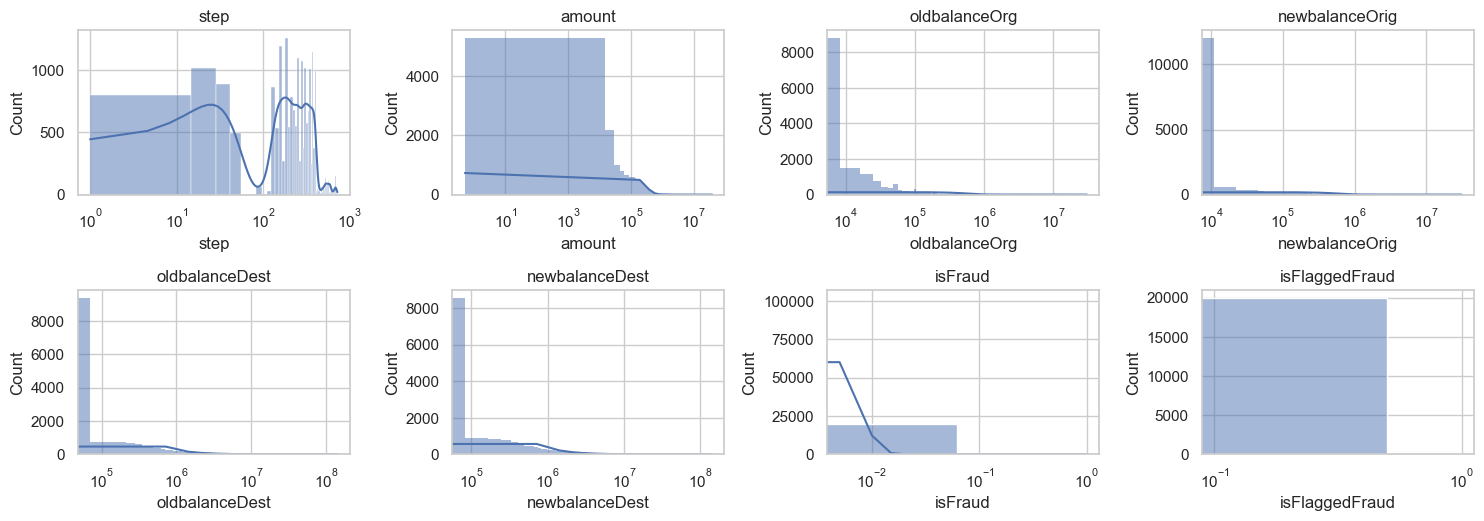

In [33]:
sns.set(style="whitegrid")

# Selecting numerical columns for distribution plots
numerical_cols = fraud_new_df.select_dtypes(include=['int64', 'float64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(fraud_new_df[col], kde=True)
    plt.title(col)
    plt.xscale('log')
    plt.tight_layout()

plt.show()

Most of the distributions seem to be right skewed here. In right skewed data, the mean is typically greater than the median. 

/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/3899359498.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/yb/7r1lrc2d02b10hfzy3bjyz_00000gn/T/ipykernel_945/3899359498.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


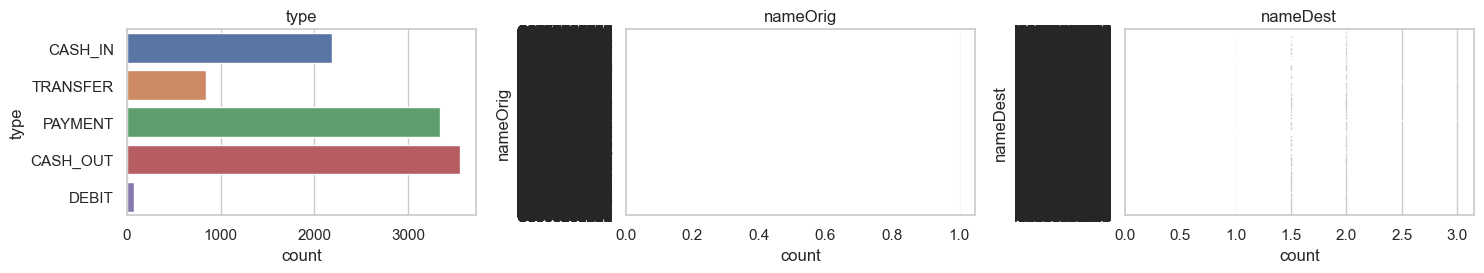

In [13]:
#distributions of categorical variables 

# Selecting categorical columns for distribution plots
categorical_cols = fraud_new_df.select_dtypes(include=['object']).columns

# Plotting distributions of categorical features
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(6, 3, i + 1)
    sns.countplot(y=fraud_new_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

It does not seem that the nameOrig and nameDest columns are appropriate for our analysis as the names are only specific to the account and show no significant insights for fraudulent data. However the highest type of data within this dataset are within the cash_out type. 

**Bivariate Analysis**

Gauge any relationships between two columns

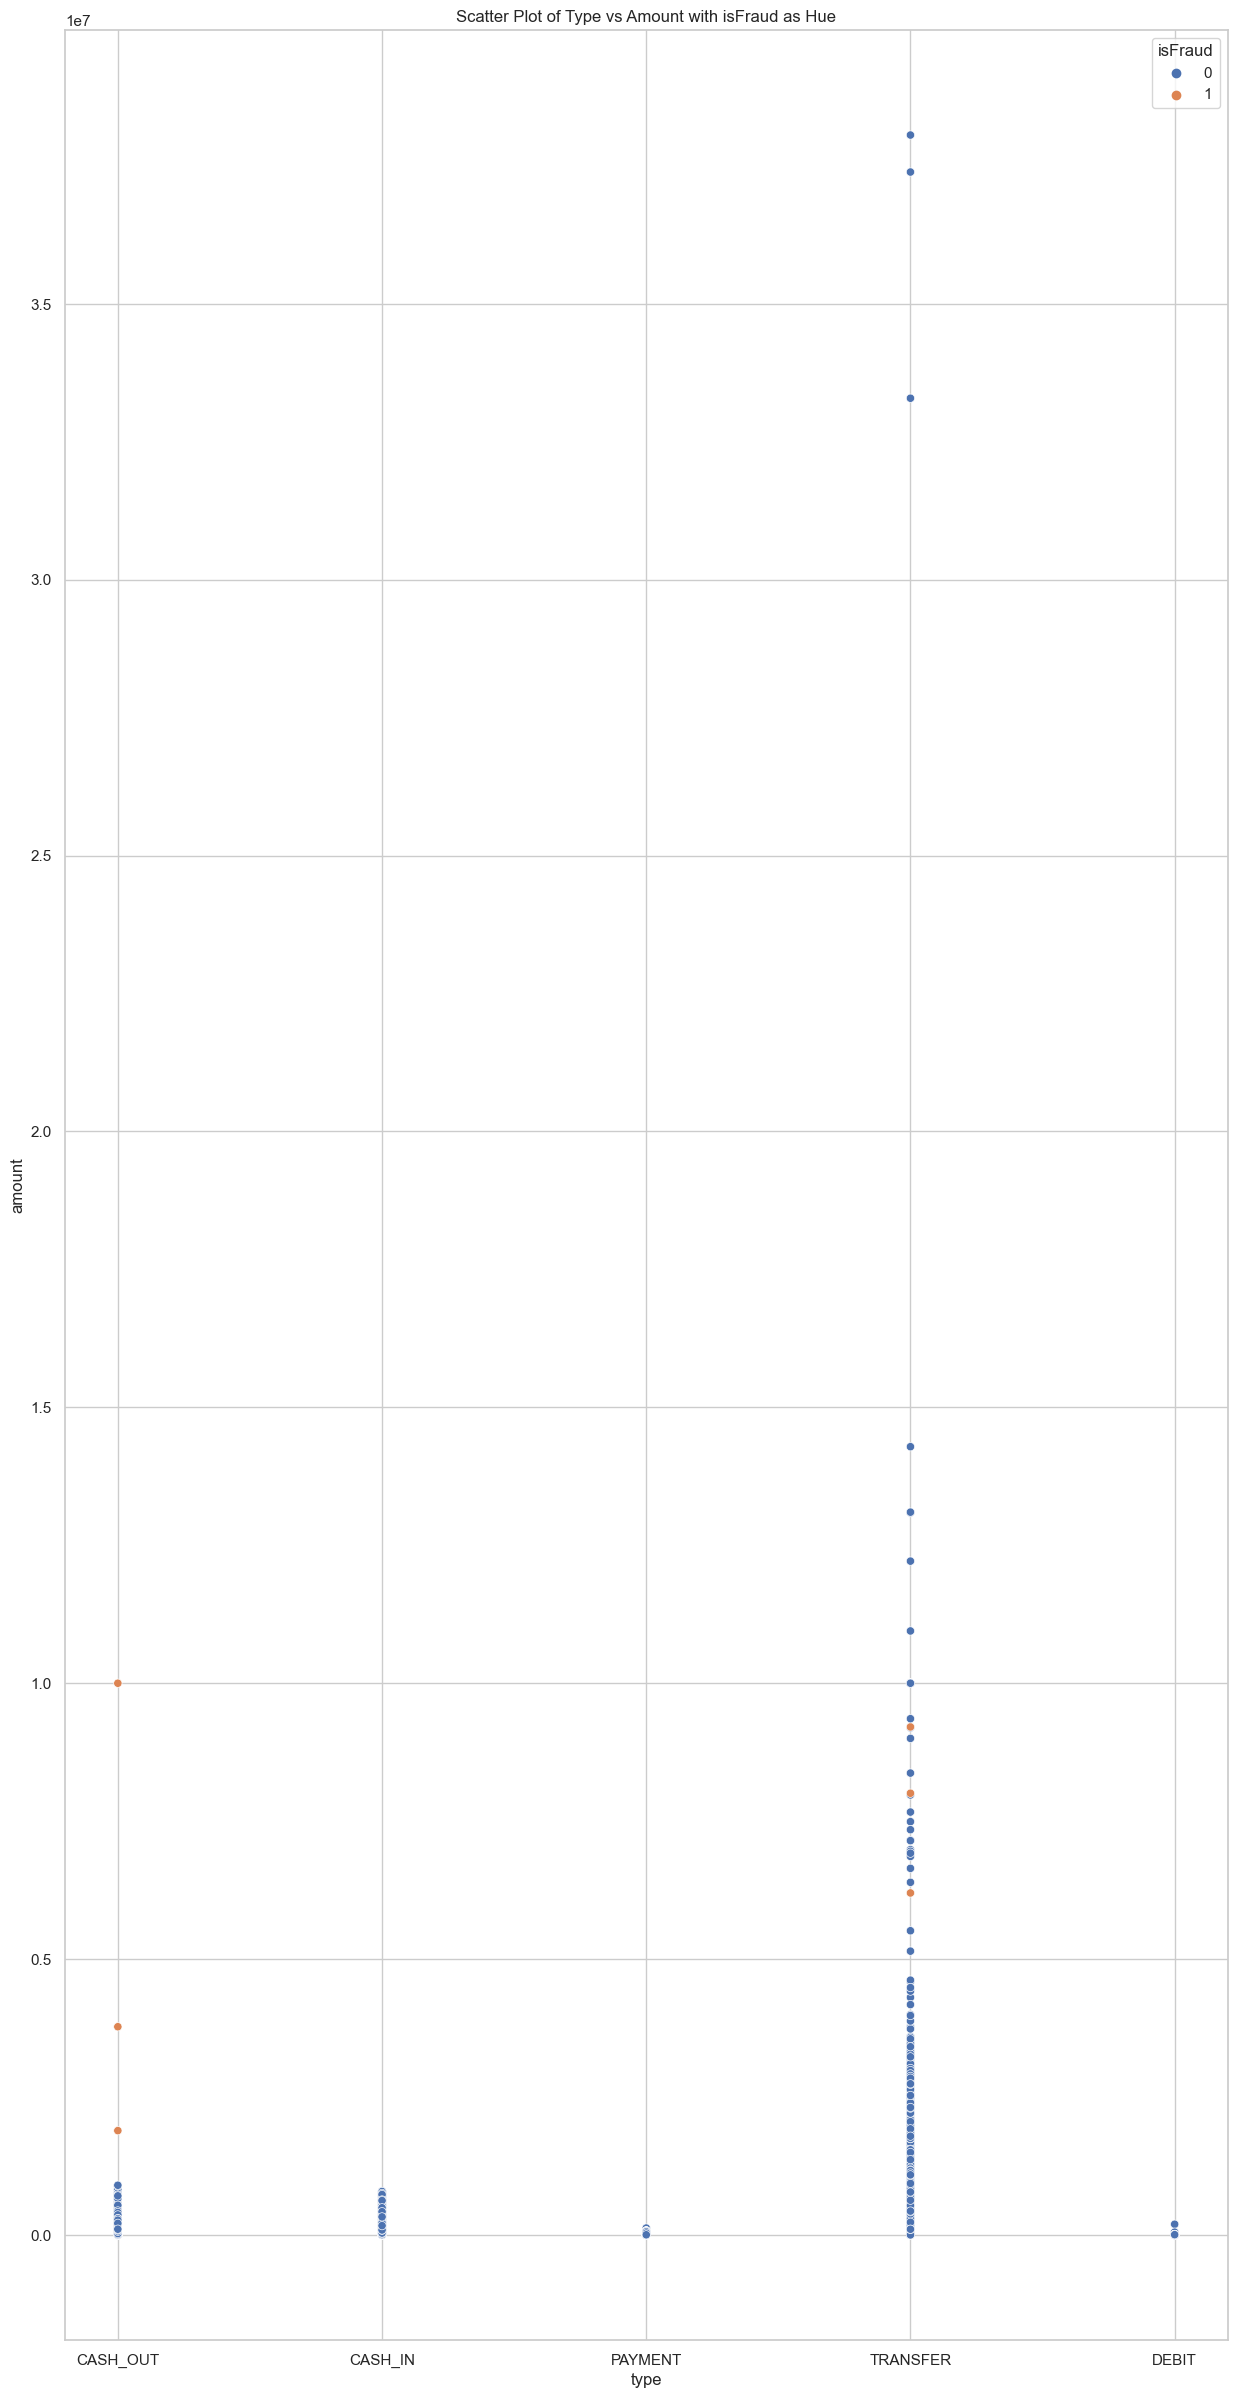

In [23]:
# type vs. amount with hue of isFraud

plt.figure(figsize=(15, 30))
sns.scatterplot(x='type', y='amount', hue='isFraud', data=fraud_new_df)
plt.title('Scatter Plot of Type vs Amount with isFraud as Hue')
plt.show()

We are able to see how there are fraudulent cases within the CASH_OUT and TRANSFER types. 

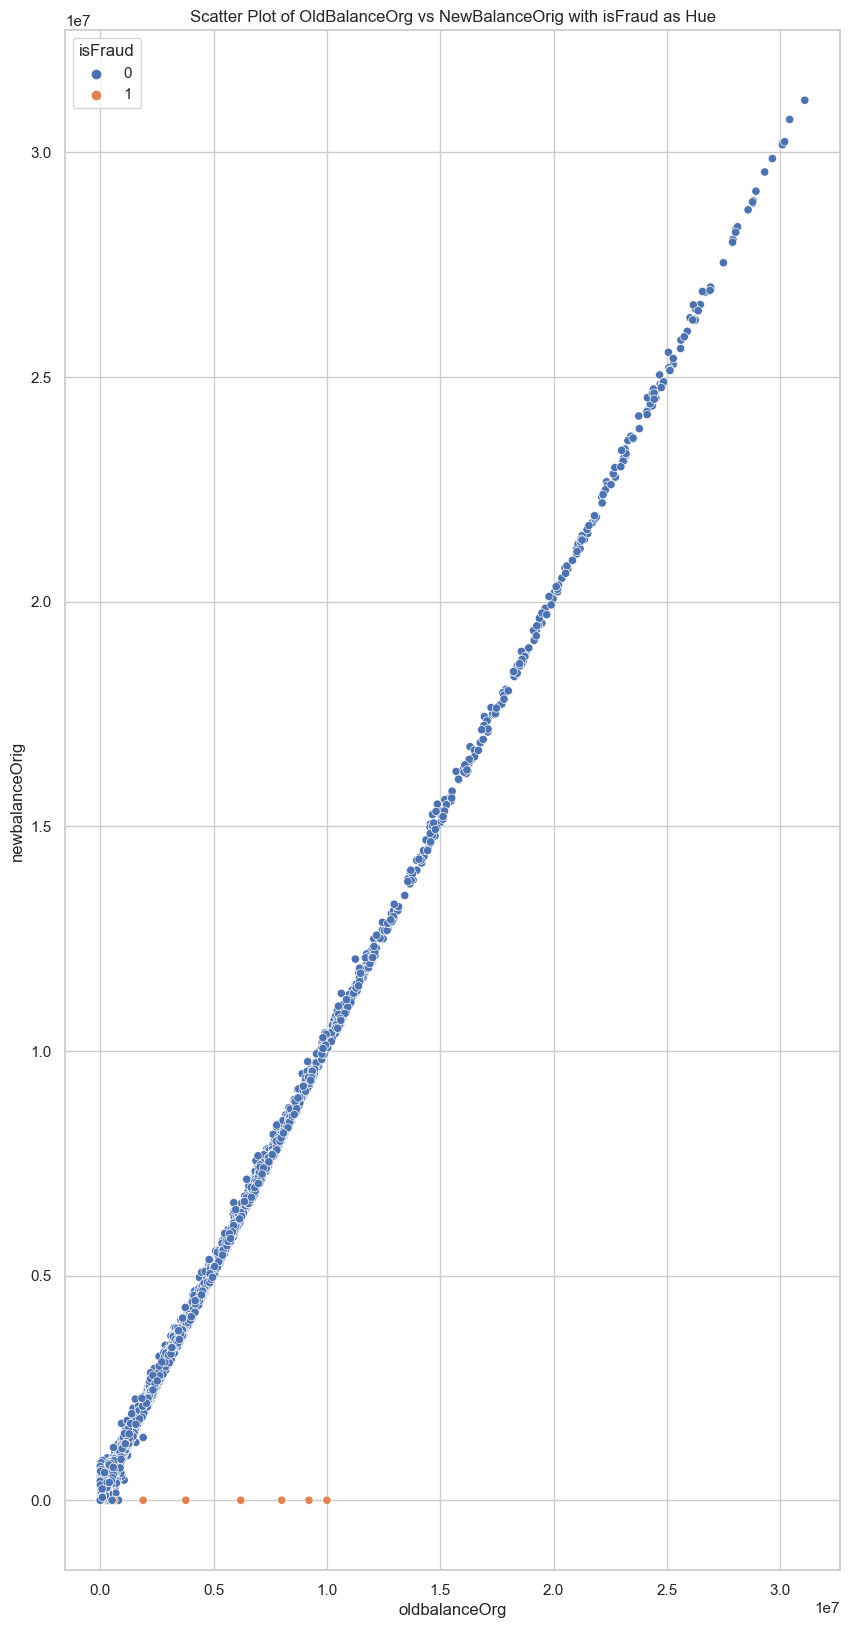

In [28]:
# OldBalanceOrg vs. NewBalanceOrig with hue of isFraud 

plt.figure(figsize=(10, 20))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=fraud_new_df)
plt.title('Scatter Plot of OldBalanceOrg vs NewBalanceOrig with isFraud as Hue')
plt.show()

It seems as there is a positive correlation between the new and old balances of the origin accounts except for when there is a fraudulent case. Then there is stagnancy occurring possibly due to stolen money. 

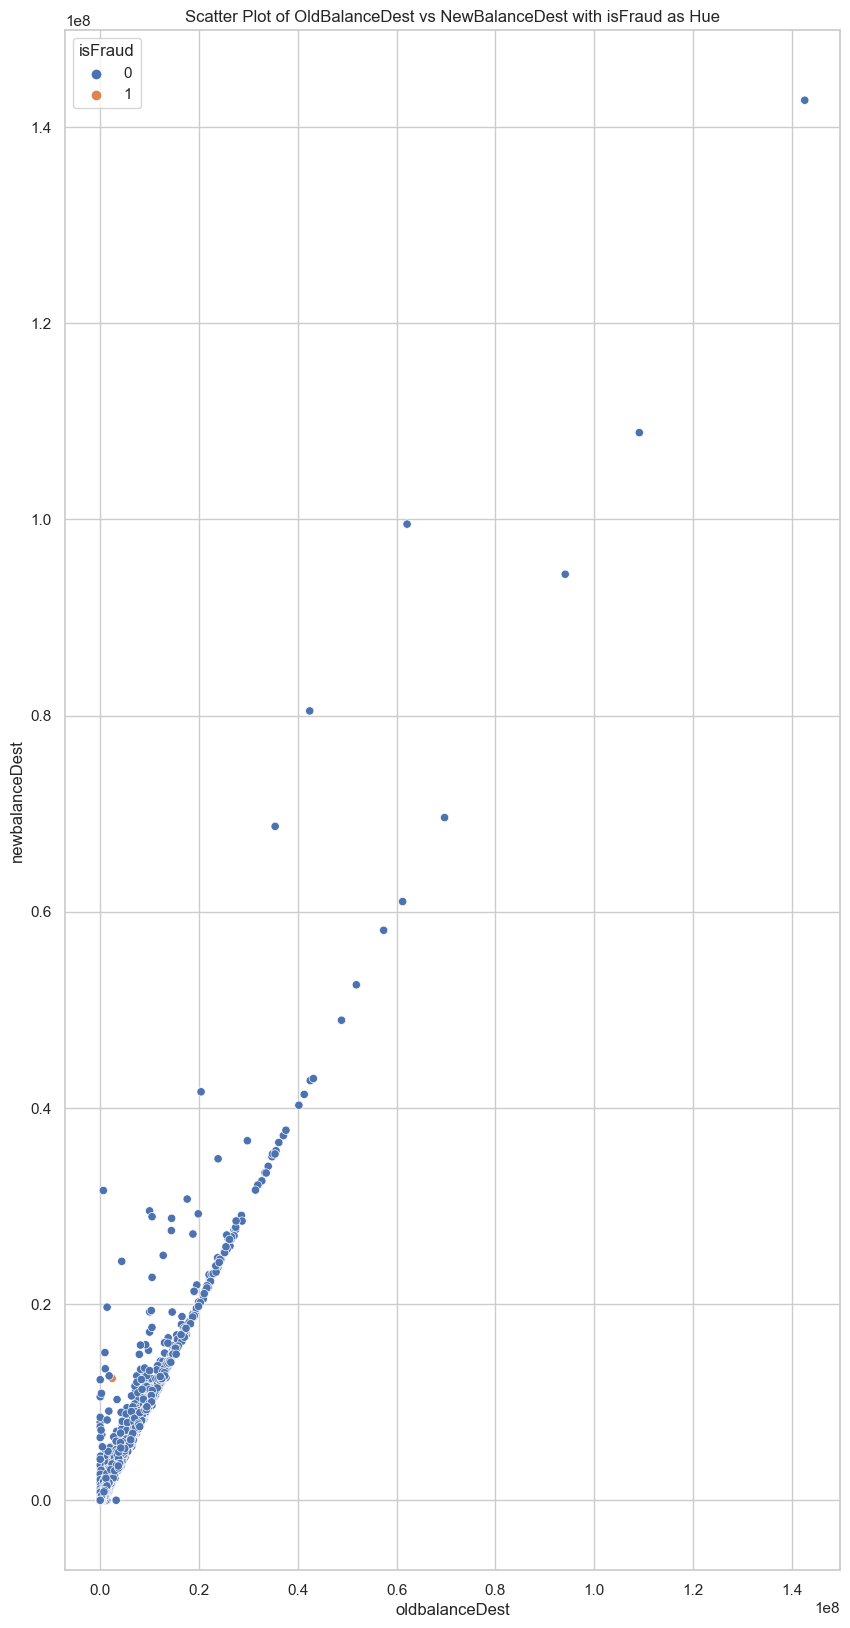

In [29]:
# OldBalanceDest vs. NewBalanceDest with hue of isFraud 

plt.figure(figsize=(10, 20))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=fraud_new_df)
plt.title('Scatter Plot of OldBalanceDest vs NewBalanceDest with isFraud as Hue')
plt.show()

Text(0.5, 1.0, 'Box Plot of Type  vs Amount')

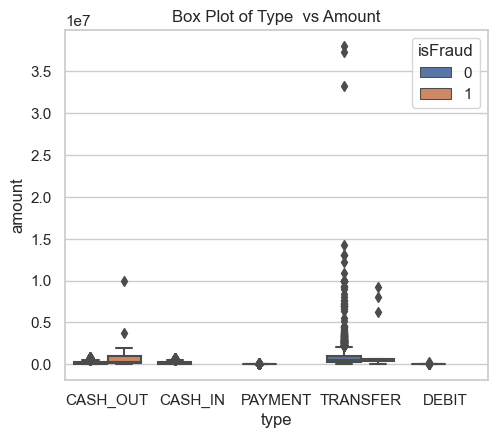

In [37]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='type', y='amount', hue='isFraud' , data=fraud_new_df)
plt.title('Box Plot of Type  vs Amount')

**Multivariate Analysis**

Gauge relationships between multiple columns  

<function matplotlib.pyplot.show(close=None, block=None)>

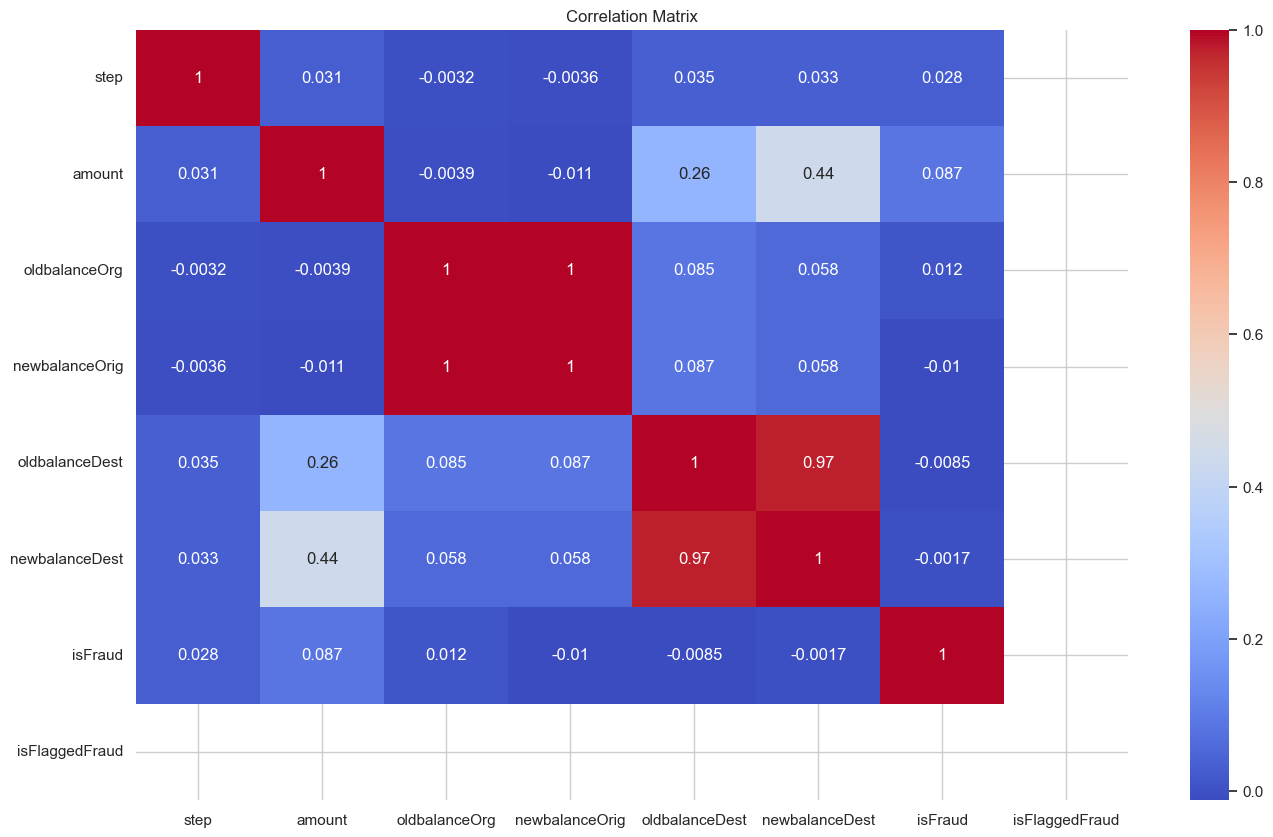

In [30]:
# creating a correlation matrix with only the numeric columns within the dataset

correlation_matrix = fraud_new_df.corr(numeric_only= True)

plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show

In [31]:
# save dataframe as a new csv file to be used in the next step

fraud_new_df.to_csv('../data/fraud_new.csv')